<a href="https://colab.research.google.com/github/averymnelson/AI-sp25/blob/main/Homework5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 5

This is an basecode for assignment 5 of Artificial Intelligence class (CSCE-4613), Spring 2025

In [1]:
import torch
import torchvision
import torch.nn as nn
from torchvision import transforms

from PIL import Image
import pickle
import matplotlib.pyplot as plt

## Question 1
### Define Input Transformation

In [3]:
MEAN = [0.485, 0.456, 0.406]
STD = [0.229, 0.224, 0.225]
IMAGE_SIZE = 224
image_transforms = transforms.Compose([
                           transforms.Resize(IMAGE_SIZE),
                           transforms.CenterCrop(IMAGE_SIZE),
                           transforms.ToTensor(),
                           transforms.Normalize(mean = MEAN, std = STD)])

index2name = pickle.load(open("imagenet_class_names.pkl", "rb"))


### Define Model

In [4]:
model = torchvision.models.resnet50(pretrained=True)
softmax_layer = nn.Softmax(dim=1)
model.eval()

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 156MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

### Classify and Visualize Image

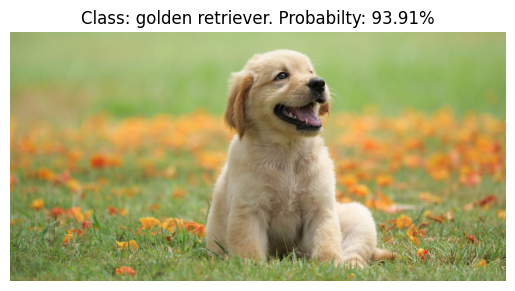

In [5]:
image_path = "dog.jpg"
original_image = Image.open(image_path).convert("RGB")
image = image_transforms(original_image)
image = image.unsqueeze(0)
output = softmax_layer(model(image))

prediction = torch.argmax(output, dim=1).item()
prob = output[0, prediction].item() * 100
predicted_name = index2name[prediction]

plt.imshow(original_image)
plt.title("Class: %s. Probabilty: %.2f" % (predicted_name, prob) + "%")
plt.axis("off")
plt.show()

### Get Top-K Predictions

In [6]:
K = 5
# Write your code to get the top-K predictions (top K classes that have highest probabilities)
top_k_values, top_k_indices = torch.topk(output, K, dim=1)
top_k_probs = top_k_values[0].tolist()
top_k_classes = top_k_indices[0].tolist()

# Print top-K predictions
print("Top {} predictions:".format(K))
for i in range(K):
    class_name = index2name[top_k_classes[i]]
    probability = top_k_probs[i] * 100
    print("{}. {} - {:.2f}%".format(i+1, class_name, probability))

Top 5 predictions:
1. golden retriever - 93.91%
2. Labrador retriever - 3.65%
3. Brittany spaniel - 0.69%
4. clumber, clumber spaniel - 0.30%
5. tennis ball - 0.29%


## Question 2

### Define Training Data Loader

In [7]:
train_batch_size = 32
train_transforms = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2470, 0.2435, 0.2616))
])

# Define training dataset and data loader
train_dataset = torchvision.datasets.CIFAR10(root='data/CIFAR-10', train=True,
                                            download=True, transform=train_transforms)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=train_batch_size,
                                          shuffle=True, num_workers=2)

100%|██████████| 170M/170M [00:03<00:00, 48.3MB/s]


### Define Model and Training Framework

Epoch [1/3]. Iter [1/1563]. Loss: 2.2916. Accuracy: 12.50
Epoch [1/3]. Iter [201/1563]. Loss: 1.4965. Accuracy: 40.62
Epoch [1/3]. Iter [401/1563]. Loss: 1.5610. Accuracy: 46.88
Epoch [1/3]. Iter [601/1563]. Loss: 1.4966. Accuracy: 40.62
Epoch [1/3]. Iter [801/1563]. Loss: 1.4353. Accuracy: 43.75
Epoch [1/3]. Iter [1001/1563]. Loss: 1.1127. Accuracy: 62.50
Epoch [1/3]. Iter [1201/1563]. Loss: 1.2591. Accuracy: 56.25
Epoch [1/3]. Iter [1401/1563]. Loss: 1.1439. Accuracy: 56.25
Epoch [2/3]. Iter [1/1563]. Loss: 1.4925. Accuracy: 46.88
Epoch [2/3]. Iter [201/1563]. Loss: 0.9655. Accuracy: 59.38
Epoch [2/3]. Iter [401/1563]. Loss: 0.8149. Accuracy: 71.88
Epoch [2/3]. Iter [601/1563]. Loss: 1.0035. Accuracy: 62.50
Epoch [2/3]. Iter [801/1563]. Loss: 1.0080. Accuracy: 65.62
Epoch [2/3]. Iter [1001/1563]. Loss: 1.1147. Accuracy: 62.50
Epoch [2/3]. Iter [1201/1563]. Loss: 1.0802. Accuracy: 65.62
Epoch [2/3]. Iter [1401/1563]. Loss: 0.7983. Accuracy: 68.75
Epoch [3/3]. Iter [1/1563]. Loss: 0.96

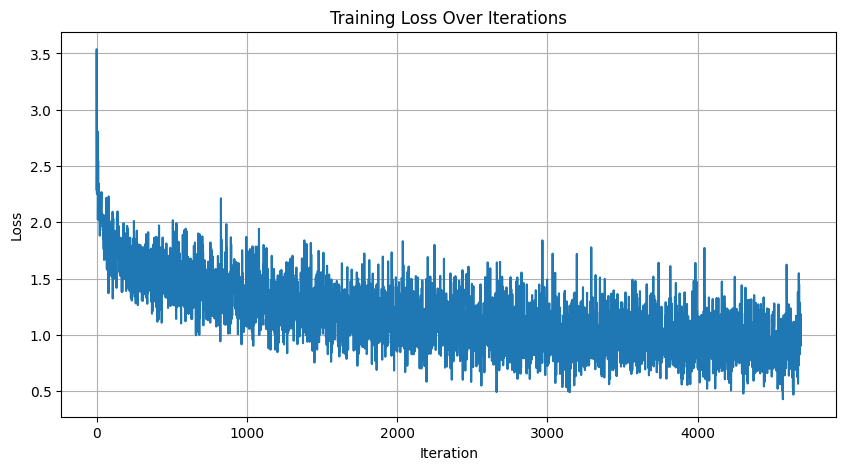

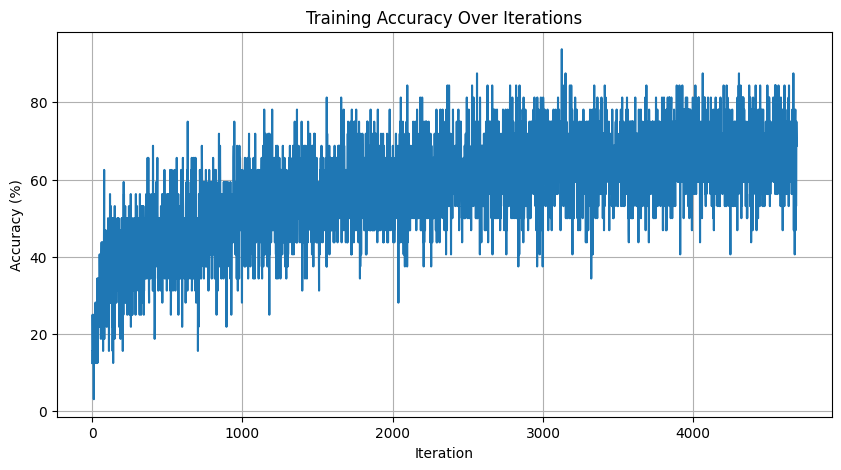

In [9]:
cuda = torch.cuda.is_available()
# model = None # Define a classification model for 10 classes
# Define a simple CNN for CIFAR-10
class CIFAR10CNN(nn.Module):
    def __init__(self):
        super(CIFAR10CNN, self).__init__()
        # Convolutional layers
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)

        # Pooling layer
        self.pool = nn.MaxPool2d(2, 2)

        # Fully connected layers
        self.fc1 = nn.Linear(128 * 4 * 4, 512)
        self.fc2 = nn.Linear(512, 10)

        # Dropout
        self.dropout = nn.Dropout(0.2)

        # Batch normalization
        self.bn1 = nn.BatchNorm2d(32)
        self.bn2 = nn.BatchNorm2d(64)
        self.bn3 = nn.BatchNorm2d(128)

    def forward(self, x):
        # Apply convolution, batch norm, ReLU, and pooling
        x = self.pool(torch.relu(self.bn1(self.conv1(x))))
        x = self.pool(torch.relu(self.bn2(self.conv2(x))))
        x = self.pool(torch.relu(self.bn3(self.conv3(x))))

        # Flatten
        x = x.view(-1, 128 * 4 * 4)

        # Fully connected with dropout
        x = self.dropout(torch.relu(self.fc1(x)))
        x = self.fc2(x)

        return x

# Initialize the model
model = CIFAR10CNN()

if cuda:
  model.cuda()

model.train()
learning_rate = 0.001
num_epochs = 3
optim = torch.optim.Adam(model.parameters(), lr = learning_rate)
loss_fn = nn.CrossEntropyLoss()
loss_logger = []
accuracy_logger = []

for epoch in range(1, num_epochs + 1):
  for it, (images, labels) in enumerate(train_loader):
      if cuda:
        images = images.cuda()
        labels = labels.cuda()

      # Write your code to computer outputs, loss, accuracy, and optimize model
      # outptus = ???
      # loss = ???
      # accuracy = ???
      # optimize the model
      # loss = None
      # accuracy = None
            # Forward pass
      outputs = model(images)
      loss = loss_fn(outputs, labels)

      # Backward and optimize
      optim.zero_grad()
      loss.backward()
      optim.step()

      # Calculate accuracy
      _, predicted = torch.max(outputs.data, 1)
      total = labels.size(0)
      correct = (predicted == labels).sum().item()
      accuracy = correct / total * 100

      loss_logger.append(loss.item())
      accuracy_logger.append(accuracy)

      if it % 200 == 0:
        print("Epoch [%d/%d]. Iter [%d/%d]. Loss: %0.4f. Accuracy: %.2f" % (epoch, num_epochs, it + 1, len(train_loader), loss, accuracy))

torch.save(model.state_dict(), "CIFAR10-Model.pth")

# Write your code to visualize the training losses over interations
plt.figure(figsize=(10, 5))
plt.plot(loss_logger)
plt.title('Training Loss Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

# Write your code to visualize the training accuracies over interations
plt.figure(figsize=(10, 5))
plt.plot(accuracy_logger)
plt.title('Training Accuracy Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Accuracy (%)')
plt.grid(True)
plt.show()

### Load Model and Evaluate Model On Testing Dataset

Iter [1/100]. Accuracy: 74.00
Final Accuracy: 71.15
Top 5 Accuracy: 0.950


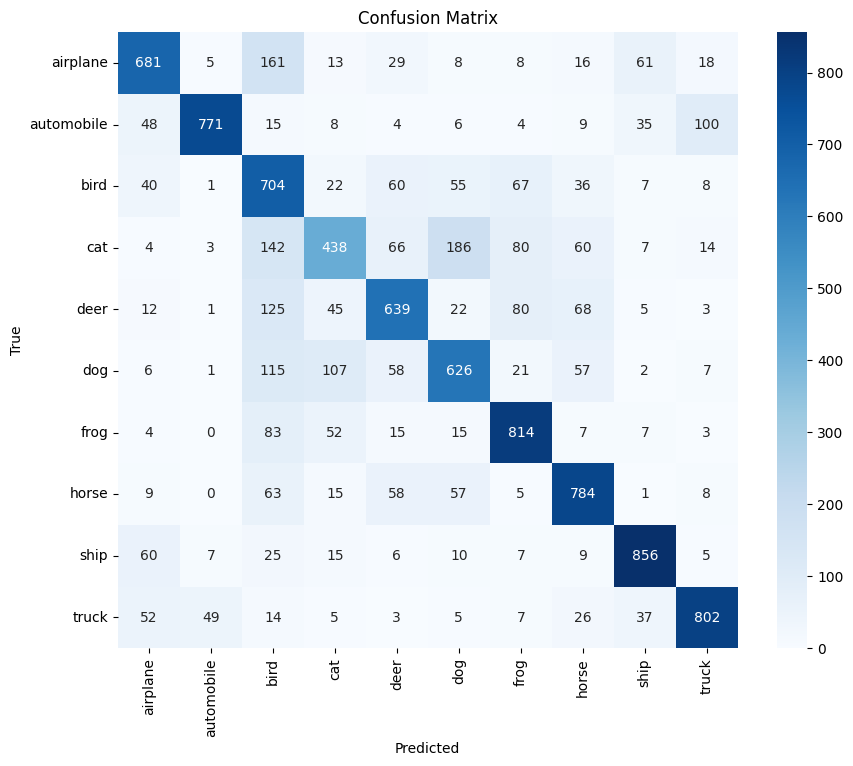

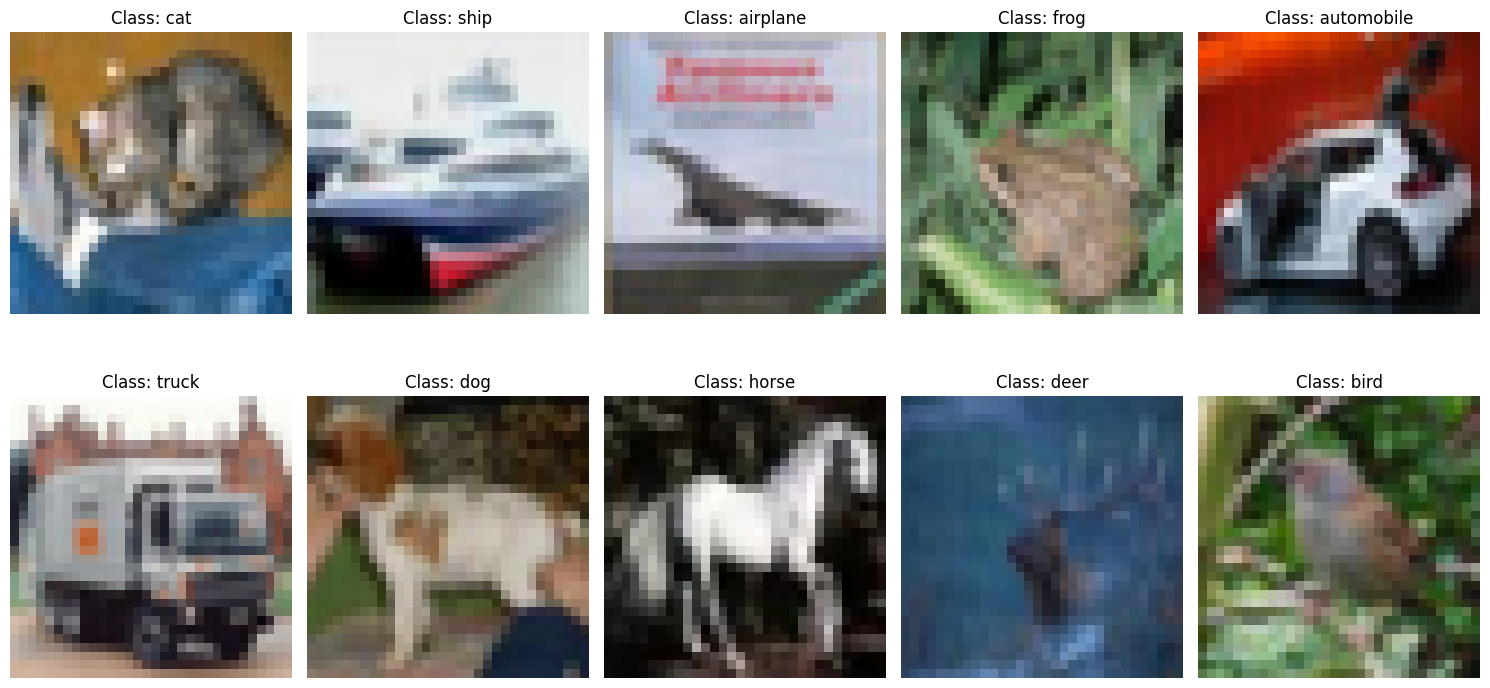

In [11]:
cuda = torch.cuda.is_available()
# model = # Define a classification model for 10 classes
model = CIFAR10CNN()
if cuda:
  model.cuda()

# Load your trained model in the previous step
model.load_state_dict(torch.load("CIFAR10-Model.pth"))
model.eval()

# test_dataset = None # Define Testing Set of CIFAR-10
# test_loader = None # Define Testing Loader of CIFAR-10
# Define test dataset and loader
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2470, 0.2435, 0.2616))
])

test_dataset = torchvision.datasets.CIFAR10(root='data/CIFAR-10', train=False,
                                           download=True, transform=test_transforms)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=100,
                                         shuffle=False, num_workers=2)
all_predictions = []
all_labels = []

final_accuracy = 0.0
final_top_5_acuuracy = 0.0


for it, (images, labels) in enumerate(test_loader):
  if cuda:
    images = images.cuda()
    labels = labels.cuda()

    # Write your code to computer outputs, accuracy, and top 5 accuracy
    # outptus = ???
    # accuracy = ???
    # top_5_acuuracy = ???
    # accuracy = None
    # top_5_acuuracy = None
 # Forward pass
  outputs = model(images)

  # Calculate accuracy
  _, predicted = torch.max(outputs.data, 1)
  total = labels.size(0)
  correct = (predicted == labels).sum().item()
  accuracy = correct / total * 100

  # Calculate top-5 accuracy
  _, top5_indices = torch.topk(outputs, 5, dim=1)
  batch_correct = 0
  for i in range(len(labels)):
      if labels[i] in top5_indices[i]:
          batch_correct += 1
  top_5_acuuracy = batch_correct / total * 100
  all_predictions.extend(predicted.cpu().numpy())
  all_labels.extend(labels.cpu().numpy())
  final_accuracy += accuracy
  final_top_5_acuuracy += top_5_acuuracy

  if it % 500 == 0:
    print("Iter [%d/%d]. Accuracy: %.2f" % (it + 1, len(test_loader), accuracy))

print("Final Accuracy: %0.2f" % (final_accuracy / len(test_loader)))
print("Top 5 Accuracy: %0.3f" % (top_5_acuuracy / len(test_loader)))

from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns

# CIFAR-10 class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
cm = confusion_matrix(all_labels, all_predictions)

# Write your code to visualize the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Write your code to visualize the correct predictions
def imshow(img):
    # Convert tensor to numpy array and unnormalize
    img = img.cpu().numpy().transpose((1, 2, 0))
    mean = np.array([0.4914, 0.4822, 0.4465])
    std = np.array([0.2470, 0.2435, 0.2616])
    img = std * img + mean
    img = np.clip(img, 0, 1)
    return img

# Get 10 correctly predicted samples (try to get one from each class if possible)
correct_samples = []
correct_labels = []
class_counts = {i: 0 for i in range(10)}  # Track count of each class

with torch.no_grad():
    for images, labels in test_loader:
        if cuda:
            images = images.cuda()
            labels = labels.cuda()

        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

        # Find correctly predicted samples
        for i in range(len(images)):
            if predicted[i] == labels[i] and class_counts[labels[i].item()] < 1:
                correct_samples.append(images[i].cpu())
                correct_labels.append(labels[i].item())
                class_counts[labels[i].item()] += 1

        # Check if we have at least one sample from each class
        if sum(class_counts.values()) >= 10:
            break

# Display the correctly predicted samples
plt.figure(figsize=(15, 8))
for i in range(min(10, len(correct_samples))):
    plt.subplot(2, 5, i+1)
    sample_img = imshow(correct_samples[i])
    plt.imshow(sample_img)
    plt.title(f"Class: {class_names[correct_labels[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()